# Homework 4 Part 2

**Due: Monday, November 6, 11:59 PM**

This is an individual assignment.

## Description

Create or edit this Jupyter Notebook to answer the questions below. Use simulations to answer these questions. An analytical solution can be useful to check if your simulation is correct but analytical solutions alone will not be accepted as a solution to a problem.

In [2]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Problem 8

Build a function that simulates the communication system in Problem 7. Take as input the value of $b$ and the number of iterations. Your simulation should implement the decision rule given in (7) and return or print the probability of error.   

1. Run your simulation and output the probability of error when $b=1.2$.

2. Run your simulation and output the probability of error when $b=1.6$.

In [22]:
def simulate_comm_system(b, num_sims=100_000):
    # Initialize counters for errors when T0 and T1 occur
    errors_T0 = 0
    errors_T1 = 0
    
    # Prior probabilities
    p_T0 = 0.4
    p_T1 = 0.6
    
    # Run simulation
    for _ in range(num_sims):
        # Determine which signal is sent
        if npr.rand() < p_T0:

            received_signal = npr.uniform(0, b)

            if received_signal >= 1:
                errors_T0 += 1
        else:
            received_signal = npr.uniform(1,1 + b)
            # If decision rule says T0, then it's an error
            if received_signal < 1:
                errors_T1 += 1
    
    # Calculate probabilities of error
    prob_error_T0 = errors_T0 / (num_sims * p_T0)
    prob_error_T1 = errors_T1 / (num_sims * p_T1)
    prob_error = prob_error_T0 * p_T0 + prob_error_T1 * p_T1
    
    return prob_error

# Run simulation and print the probabilities of error for b = 1.2 and b = 1.6
print("Probability of error for b=1.2:", simulate_comm_system(1.2))
print("Probability of error for b=1.6:", simulate_comm_system(1.6))


Probability of error for b=1.2: 0.0674
Probability of error for b=1.6: 0.15023


## Problem 9

Create a discrete random variable object using SciPy.stats. You can do this by calling `stats.rv_discrete()` and using the keyword argument `values` to pass a tuple containing the values that the random variable takes on and the corresponding probabilities. See the help for more details. Then use the object you created to answer the following problems:



a. Make a stem plot of the PMF of $X$.

b. Make a staircase plot of the CDF of $X$.

c. Find the mean of $X$.

d. Find the variance of $X$.

e. Drawn 100,000 random values from this distribution. For each value $x_i$, let $y_i=(x_i-2)^2$. Find the sample mean of the $y_i$ values.

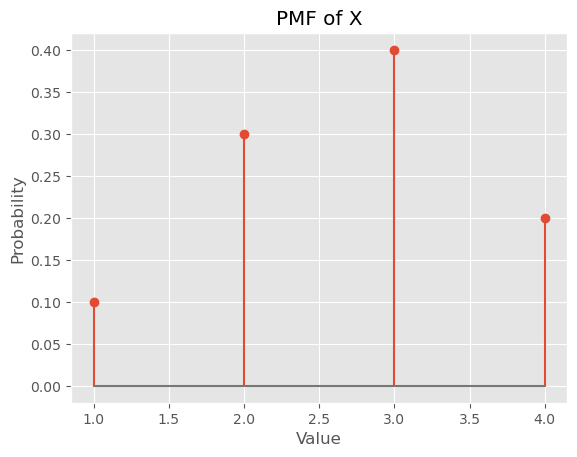

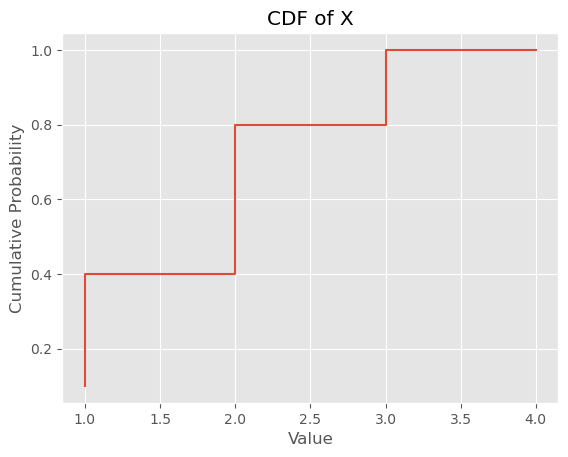

Mean of X:2.7
Variance of X:0.8100000000000005
Sample mean of the yi values: 1.31087


In [6]:

x = np.array([1, 2, 3, 4])
p = np.array([0.1, 0.3, 0.4, 0.2])

# Create the discrete random variable
X = stats.rv_discrete(name='X', values=(x, p))

# a. Make a stem plot of the PMF of X
plt.stem(x, X.pmf(x))
plt.title('PMF of X')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

# b. Make a staircase plot of the CDF of X
plt.step(x, X.cdf(x))
plt.title('CDF of X')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.show()

# c. Find the mean of X
mean_X = X.mean()
print(f"Mean of X:{mean_X}")

# d. Find the variance of X
variance_X = X.var()
print(f"Variance of X:{variance_X}")

# e. Draw 100,000 random values from this distribution. For each value xi, let yi=(xi-2)^2. 
# Find the sample mean of the yi values.
random_values = X.rvs(size=100000)
y_values = (random_values - 2)**2
sample_mean_y = y_values.mean()
print("Sample mean of the y values:", sample_mean_y)


## Problem 10

In this problem you will be working with the [Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

This data set contains 569 samples of digitized images of a fine needle aspirate (FNA) of a breast mass. Each sample describes the mass using 30 features, which include the average radius of the cell present in the FNA image. 
Each sample is labeled as benign (class = 1) or malignant (class = 0).

We will use the ```scikit-learn``` library to load it and write it as a pandas dataframe:

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y = False)
# print(data.DESCR) # uncomment this to learn more about this dataset

df = pd.DataFrame(data = np.hstack((data.target[:,np.newaxis], data.data)),
                      columns = np.concatenate((['Class'],data.feature_names)))
df

,Class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


For each class (benign and malignant), consider the **mean radius** column. Answer the following questions:

1. Plot overlapping histograms of the two types of samples (malignant and benign).
2. Estimate the probability density function using Kernel density estimation (kde) for the mean radius for both malignant and benign samples. Create a plot where both the histograms and estimated density functions. Include legend and axis labels.
3. Compute the prior probability of each class.

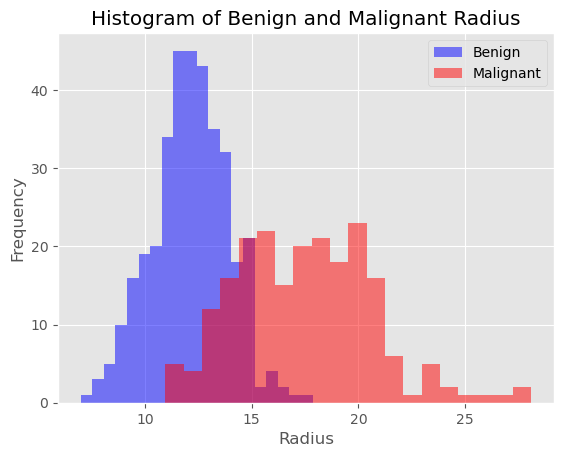

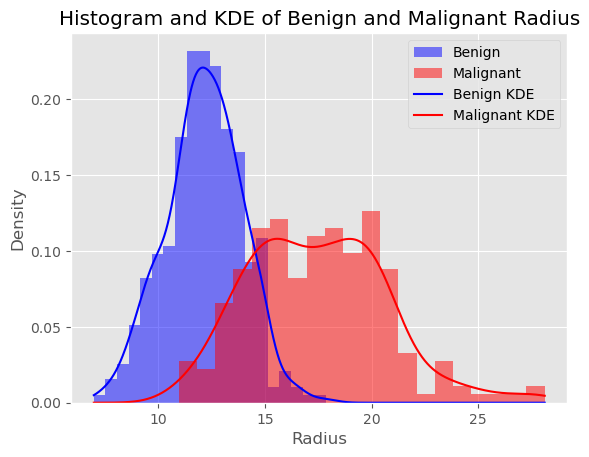

The probability of a tumor being benign is 0.63
The probability of a tumor being malignant is 0.37


In [15]:
# Seperate Benign and Malignant radius data
benign_radius = df[df['Class'] == 1]['mean radius']
malignant_radius = df[df['Class'] == 0]['mean radius']

# Plot histograms of the two data frames
plt.hist(benign_radius, bins=20, alpha=0.5, color='blue', label='Benign')
plt.hist(malignant_radius, bins=20, alpha=0.5, color='red', label='Malignant')
plt.legend(loc='upper right')
plt.title('Histogram of Benign and Malignant Radius')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.show()

# Estimate the probability density functions of the two data sets using kernel density estimation for mean radius for both benign and malignant datasets. Create a plot where both the histograms and the estimated density functions
kde_benign = stats.gaussian_kde(benign_radius)
kde_malignant = stats.gaussian_kde(malignant_radius)

# Values for plotting KDE
x = np.linspace(min(df['mean radius']), max(df['mean radius']), 1000)

# Plotting histograms and KDEs on the same plot
plt.hist(benign_radius, bins=20, alpha=0.5, color='blue', label='Benign', density=True)
plt.hist(malignant_radius, bins=20, alpha=0.5, color='red', label='Malignant', density=True)
plt.plot(x, kde_benign(x), color='blue', label='Benign KDE')
plt.plot(x, kde_malignant(x), color='red', label='Malignant KDE')
plt.legend(loc='upper right')
plt.title('Histogram and KDE of Benign and Malignant Radius')
plt.xlabel('Radius')
plt.ylabel('Density')
plt.show()

# Compute the prior probabilities of benign and malignant tumors
print(f'The probability of a tumor being benign is {len(benign_radius) / len(df):.2f}') 
print(f'The probability of a tumor being malignant is {len(malignant_radius) / len(df):.2f}')

# Submission Instructions:

When you are done with the exercises in this notebook, upload a PDF or your results to Canvas.  To create the PDF with your code and results, you can use the following procedure:

1. Go to Kernel
2. Click Restart and Run All
3. Check over the notebook to make sure everything still looks right

**At this point, you may be able to just choose "Print" from JupyterLab's File menu and then print to PDF (OS dependent). If everything is correct in the PDF version, then upload that PDF to the assignment in Canvas.**

**If your PDF is missing any of your outputs, you can use the following procedure:**

4. Next, click File at the top on the tool bar below Jupyter icon
5. Click Save and Export Notebook as... and choose HTML
6. The HTML file will either open in a new tab/window or be downloaded to your Downloads folder. Open it if it is in the Downloads folder
7. Print the HTML file to PDF (how to do this is OS dependent). Make sure to save it to somewhere you can find it
8. Open the PDF to make sure that everything looks right and that nothing is cut off
9. Upload both the PDF and ipynb files to the Canvas assignment